<a href="https://colab.research.google.com/github/anusurabhi/Data-Science/blob/main/cell%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

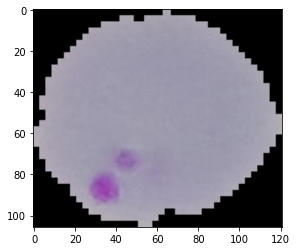

In [62]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.image import imread
import tensorflow as tf
from matplotlib.image import imread #To view an image as an array
from tensorflow.keras.preprocessing.image import ImageDataGenerator # To process images
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

data_dir = "C:\\Users\\anu\\Desktop\\cell_images"
os.listdir(data_dir) # This will list out all the documents or folders inside the data_dir folder

#To concatenate other directories inside

test_path = data_dir + "\\test\\"
train_path = data_dir + "\\train\\"

first_image = os.listdir(test_path+"Parasitized")[0] # To see a sample image
first_image_to_np_array = imread(test_path+"Parasitized\\"+first_image)

#To show as image
plt.imshow(first_image_to_np_array)

In [11]:
#Find the average dimension of the image from a group of image

dim1 = []
dim2 = []

for image_filename in os.listdir(train_path+'Uninfected'):
  img = imread(train_path + 'Uninfected\\' + image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

# dim1 contains an array that has the width of all the pictures
# dim2 contains an array that has the height of all the pictures

# To find the average shape
new_width = int(np.mean(dim1)) # Here convert the floating value to integer by wrapping it into int()
new_height = int(np.mean(dim2)) # Here convert the floating value to integer by wrapping it into int()
image_shape = (new_width, new_height, 3)

In [6]:
image_shape

(131, 131, 3)

In [12]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
# rotation_range: How many degree to rotate. Above rotate 20 degree
# width_shift_range: Shift the width in percentage. Above shift 10% width
# height_shift_range: Shift the height in percentage. Above shift 10% height
# rescale=1/255: If need to normalize data. But in the above case, data already normalised. So not needed
# shear_range: This will cut away certain part of the images in percentage. Above images will be cut away 10%
# zoom_range: This will zoom images in percentage. Above zoom images 10%
# horizontal_flip: Flip images horizontally
# vertical_flip: Flip images vertically
# fill_mode='nearest' : This will fill the empty pixels based on nearest pixels after the above activities. 

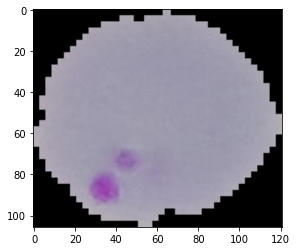

In [13]:
plt.imshow(first_image_to_np_array)

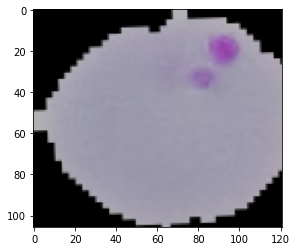

In [16]:
# To see transformation of a single picture
first_image_to_np_array # this is the np array of one of the pictures
transformed_image = image_gen.random_transform(first_image_to_np_array) # This is the transformed image in numpy array
plt.imshow(transformed_image) # Showing that transformed numpy array into an image

In [17]:
# To transform all pictures from a directory
image_gen.flow_from_directory(train_path) # train_path is the directory set above that contains two sub folders

Found 24958 images belonging to 2 classes.


In [18]:
image_gen.flow_from_directory(test_path) # test_path is the directory set above that contains two sub folders

Found 2600 images belonging to 2 classes.


In [20]:
# Now Create a model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(2,2), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 130, 130, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 65, 65, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=2) # This is setting up early stopping

In [29]:
batch_size = 16 # This is setting up batch size that needs to feed into the network
target_size = image_shape[:2] # image_shape is (3, 3, 1). For setting target_size for imageDataGenerator it only needs (3,3). So use slicing to get correct dimension

train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size = target_size,
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary',
                                                shuffle=True)

# train_path: Path to the training dataset
# target_size: Size of the image (width, height)
# color_mode: color mode of the picture. Above is rgb
# batch_size: size of the batch that go to the network
# class_mode: This is a binary classification. So the above is binary
# shuffle: This will shuffle the data


Found 24958 images belonging to 2 classes.


In [30]:
test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size = target_size,
                                                color_mode = 'rgb',
                                                batch_size = batch_size,
                                                class_mode = 'binary', 
                                                shuffle=False)

Found 2600 images belonging to 2 classes.


In [31]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [33]:
test_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [35]:
results = model.fit_generator(train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 332s 212ms/step - loss: 1.0599 - accuracy: 0.8766 - val_loss: 0.3245 - val_accuracy: 0.8642
Epoch 2/20
1560/1560 [==============================] - 357s 229ms/step - loss: 0.2389 - accuracy: 0.9343 - val_loss: 0.2647 - val_accuracy: 0.8946
Epoch 3/20
1560/1560 [==============================] - 338s 216ms/step - loss: 0.2251 - accuracy: 0.9342 - val_loss: 0.2650 - val_accuracy: 0.8742
Epoch 4/20
1560/1560 [==============================] - 306s 196ms/step - loss: 0.2104 - accuracy: 0.9365 - val_loss: 0.3363 - val_accuracy: 0.8688


In [37]:
matrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

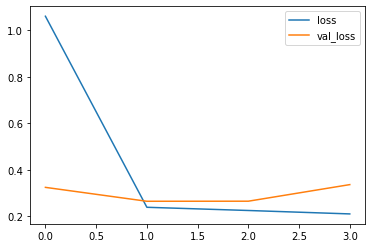

In [38]:
matrics[['loss', 'val_loss']].plot()

<AxesSubplot:>

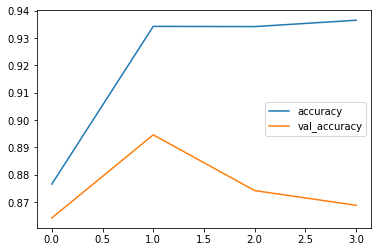

In [39]:
matrics[['accuracy', 'val_accuracy']].plot()

In [41]:
model.evaluate(test_image_gen)

163/163 [==============================] - 15s 90ms/step - loss: 0.3193 - accuracy: 0.8723


[0.31930723786354065, 0.8723077178001404]

In [42]:
model.metrics_names

['loss', 'accuracy']

In [44]:
pred = model.predict(test_image_gen) # This line is predicting the test images into probabilities

In [53]:
pred # As you can see these are probability matrix. test_image_gen.class_indices command will show 'Parasitized': 0, 'Uninfected': 1. 

array([[0.07731879],
       [0.00927749],
       [0.2719589 ],
       ...,
       [0.28694007],
       [0.9209707 ],
       [0.9188758 ]], dtype=float32)

In [46]:
# So from the above matrix, we set condition to output which is 0 and which is 1. 
# Here condition set was; anything more than 0.5 probability will categorise to 1
# Anything below 0.5 probability will categorise to 0
# The following condition is crucial as the classification is based on this condition
predictions = pred > 0.5 

In [47]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [50]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [51]:
len(test_image_gen)

163

In [54]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1300
           1       0.92      0.81      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.88      0.87      0.87      2600
weighted avg       0.88      0.87      0.87      2600



In [56]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[1214   86]
 [ 249 1051]]


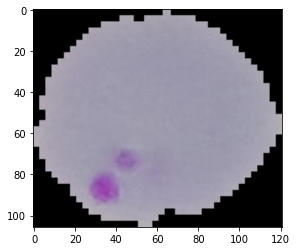

In [57]:
# Predict a new image and see which class it belongs to. 
# For easiness, we pick on image from test folder and feed it to the model
test_image = os.listdir(test_path+"Parasitized")[0] # To see a sample image
test_image_to_np_array = imread(test_path+"Parasitized\\"+test_image)
plt.imshow(test_image_to_np_array)

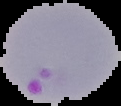

In [63]:
# To load an image directly from a directory file path, we could use the following library
# The following codes do the same as the above. Instead of converting an image to a numpy array and use imshow, the following 
# will directly show the image by giving the full path of an image
from tensorflow.keras.preprocessing import image
test_image_path = test_path+"Parasitized\\"+test_image
image.load_img(test_image_path)